<div align="center"> 
    <hr>
  <font size="6"><b>Dev | Clean-Clean Entity Resolution Notebook with pre-trained embeddings and FAISS</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.7.6


In [2]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write
from pyjedai.datamodel import Data
d1 = pd.read_csv("./data/ccer/D2/abt.csv", sep='|', engine='python', na_filter=False).astype(str)
d2 = pd.read_csv("./data/ccer/D2/buy.csv", sep='|', engine='python', na_filter=False).astype(str)
gt = pd.read_csv("./data/ccer/D2/gt.csv", sep='|', engine='python')

data = Data(dataset_1=d1,
            attributes_1=['id','name','description'],
            id_column_name_1='id',
            dataset_2=d2,
            attributes_2=['id','name','description'],
            id_column_name_2='id',
            ground_truth=gt)

# Block Building

In [63]:
from pyjedai.vector_based_blocking import EmbeddingsNNBlockBuilding

In [64]:
emb = EmbeddingsNNBlockBuilding(vectorizer='roberta',
                                similarity_search='faiss')
blocks = emb.build_blocks(data)

Embeddings-NN Block Building:   0%|          | 0/2152 [00:00<?, ?it/s]

Device selected:  cpu
[[-2.08760723e-02  8.71550217e-02 -1.71197541e-02 -7.62769133e-02
   3.81479114e-02 -1.50623828e-01 -4.95102257e-02  5.56908175e-03
   3.43445502e-02 -2.28946060e-02 -1.79676414e-02  3.42452899e-02
   2.33217292e-02  9.92767140e-03  5.90951666e-02  2.46980786e-02
  -1.84596702e-02  2.37337500e-02 -2.76607201e-02 -8.60242546e-03
  -5.81565201e-02  3.19667235e-02 -1.50404572e-02  1.27676785e-01
   2.53916699e-02  1.93581581e-02  5.23088872e-02  5.73309287e-02
  -1.93192512e-02 -1.12422928e-02  5.20385019e-02 -1.82715878e-02
  -4.77516651e-03 -3.86658907e-02  3.22517864e-02  6.20887056e-02
   4.41669114e-02  8.75989348e-03 -1.24415435e-01  4.24369983e-03
  -3.25413980e-02  4.16954048e-02  7.08142444e-02 -1.23653300e-02
   5.19234948e-02  2.05537006e-02  5.29931076e-02  7.02027157e-02
  -7.28936121e-02 -4.07667160e-02  3.01624406e-02  6.24784306e-02
  -2.57797912e-02  1.33591853e-02 -5.08324578e-02  2.44488847e-02
  -2.74468213e-03  4.75535914e-02  2.21690387e-02 -4.9

KeyboardInterrupt: 

In [62]:
emb.evaluate(blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Embeddings-NN Block Building
***************************************************************************************************************************
Method name: Embeddings-NN Block Building
Parameters: 
	Vectorizer: roberta
	Similarity-Search: faiss
	Top-K: 30
	Vector size: 768
Runtime: 694.1766 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      1.21% 
	Recall:        36.25%
	F1-score:       2.34%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 390
	False positives: 31890
	True negatives: 1125200
	False negatives: 686
	Total comparisons: 32280
────────────────────────────────────────────

{'Precision %': 1.20817843866171,
 'Recall %': 36.2453531598513,
 'F1 %': 2.3384098812807292,
 'True Positives': 390,
 'False Positives': 31890,
 'True Negatives': 1125200,
 'False Negatives': 686}

# Entity Matching

In [7]:
from pyjedai.matching import EntityMatching

In [ ]:
EM = EntityMatching(metric='cosine_vector_similarity')

pairs_graph = EM.predict(blocks,
                         data,
                         tqdm_disable=True,
                         vectors_d1=emb.vectors_1,
                         vectors_d2=emb.vectors_2)

In [ ]:
draw(pairs_graph)

In [42]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine_vector_similarity
	Attributes: None
	Similarity threshold: 0.5
Runtime: 11.6450 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      1.21% 
	Recall:        36.25%
	F1-score:       2.34%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 1.20817843866171,
 'Recall %': 36.2453531598513,
 'F1 %': 2.3384098812807292,
 'True Positives': 390,
 'False Positives': 31890,
 'True Negatives': 1125200,
 'False Negatives': 686}

Distribution-% of predicted scores:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]


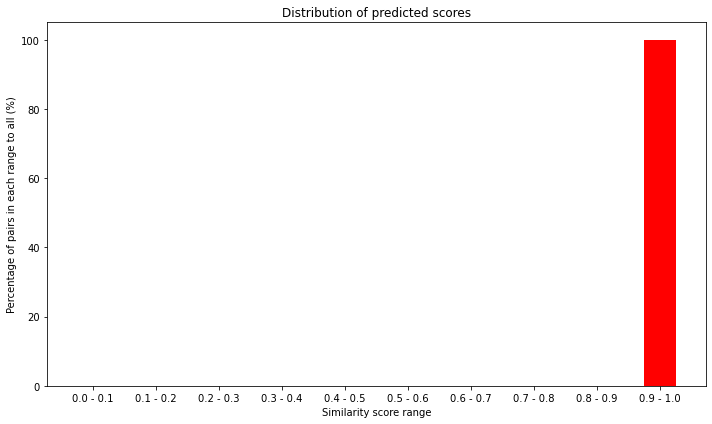

In [54]:
EM.plot_distribution_of_scores()

# Entity Clustering

In [43]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [44]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph, data)

In [45]:
ccc.report()

Method name: Connected Components Clustering
Method info: Gets equivalence clusters from the transitive closure of the similarity graph.
Parameters:  None
Runtime: 0.0080 seconds


In [46]:
ccc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.0080 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.00% 
	Recall:         0.00%
	F1-score:       0.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 0
	False positives: 0
	True negatives: 0
	False negatives: 0
	Total comparisons: 0
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


C:\Users\nikol\Desktop\GitHub\pyJedAI-Dev\pyjedai\evaluation.py:83: Warning: Evaluation: No matches found
  warn("Evaluation: No matches found", Warning)


{'Precision %': 0,
 'Recall %': 0,
 'F1 %': 0,
 'True Positives': 0,
 'False Positives': 0,
 'True Negatives': 0,
 'False Negatives': 0}

In [47]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)

In [48]:
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.3928 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      1.45% 
	Recall:         0.84%
	F1-score:       1.06%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 9
	False positives: 613
	True negatives: 1156096
	False negatives: 1067
	Total comparisons: 622
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 1.4469453376205788,
 'Recall %': 0.8364312267657992,
 'F1 %': 1.0600706713780916,
 'True Positives': 9,
 'False Positives': 613,
 'True Negatives': 1156096,
 'False Negatives': 1067}